## NLP Lab 1
### 准备工作
下载第三方 `jieba` 库
- 先下载 https://pypi.python.org/pypi/jieba/
- 解压后运行 python setup.py install

In [1]:
import gensim.models
import numpy as np
import jieba
from gensim.models import word2vec
import matplotlib
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Step1 分词
使用jieba分词工具进行分词，使用方法：jieba.cut(text)；

In [2]:
# jieba分词
print("\n1.字符串分词测试:\n")
seg_list = jieba.cut("他来到上海交通大学", cut_all=False)
print("/".join(seg_list))

Building prefix dict from the default dictionary ...



1.字符串分词测试:



Dumping model to file cache C:\Users\ECHOES\AppData\Local\Temp\jieba.cache
Loading model cost 0.650 seconds.
Prefix dict has been built successfully.


他/来到/上海交通大学


### Step2 训练词向量模型并保存
原始数据集：.\实验一数据集.txt
分词后的数据集：.\dataset_segment.txt
转换为100维词向量的数据集：.\w2v.txt
模型：.\word2vec.model

In [3]:
# word2vec训练词向量
print("\n2.词向量模型训练中...")
with open(r".\实验一数据集.txt", encoding='utf-8') as f1:
    document = f1.read()
    document_cut = jieba.cut(document)
    result = ' '.join(document_cut)
    with open(r".\dataset_segment.txt", "w", encoding='utf-8') as f2:
        f2.write(result)

corpus = r".\dataset_segment.txt"
sentences = word2vec.LineSentence(corpus)
model = word2vec.Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
model.wv.save_word2vec_format(r".\w2v.txt")   # 保存词向量字典
model.save(r".\word2vec.model")
print("\n词向量模型训练完成")


2.词向量模型训练中...

词向量模型训练完成


### Step3 相似性比较

In [4]:
# 加载保存好的模型
path = r'.\word2vec.model'
wv_model = gensim.models.Word2Vec.load(path)

In [5]:
# 相似性比较
print("\n‘中华’和'中国'相似性比较：\n")
r = wv_model.wv.similarity('中国', '中华')
print(r)
print("\n‘牛奶’和'航天'相似性比较：\n")
r = wv_model.wv.similarity('牛奶', '航天')
print(r)


‘中华’和'中国'相似性比较：

0.4699579

‘牛奶’和'航天'相似性比较：

0.20077075


### Step4 找出指定词最相似的5个词

In [26]:
# 找出指定词最相似的5个词
print("\n找‘武汉’的最相似的5个词：\n")
r = wv_model.wv.most_similar(positive=['武汉'], topn=5)
print(r)
print("\n找‘快乐’的最相似的5个词：\n")
r = wv_model.wv.most_similar(positive=['快乐'], topn=5)
print(r)
print("\n找‘占卜’的最相似的5个词：\n")
r = wv_model.wv.most_similar(positive=['占卜'], topn=5)
print(r)


找‘武汉’的最相似的5个词：

[('沈阳', 0.9436022639274597), ('成都', 0.9336646795272827), ('南京', 0.9197261333465576), ('太原', 0.9089016914367676), ('郑州', 0.906379759311676)]

找‘快乐’的最相似的5个词：

[('乐趣', 0.9004325866699219), ('爱情', 0.8724442720413208), ('亲情', 0.8642067313194275), ('温馨', 0.8597200512886047), ('浪漫', 0.8434775471687317)]

找‘占卜’的最相似的5个词：

[('白居寺', 0.929069995880127), ('王秀芬', 0.9212385416030884), ('欧阳山尊', 0.9187438488006592), ('雨里', 0.9163070321083069), ('桑树', 0.9162893295288086)]


### Step5 找出与指定词类比最相似的5个词

In [56]:
# 找出与指定词类比最相似的5个词
print("\n找'湖北,成都‘类比相似，而与'武汉'不相似的5个词：\n")
r = wv_model.wv.most_similar(positive=['湖北', '成都'], negative=['武汉'], topn=5)
print(r)
print("\n找'快乐,高兴‘类比相似，而与'悲伤'不相似的5个词：\n")
r = wv_model.wv.most_similar(positive=['快乐', '高兴'], negative=['悲伤'], topn=5)
print(r)


找'湖北,成都‘类比相似，而与'武汉'不相似的5个词：

[('河南', 0.9058181047439575), ('山东', 0.9052097201347351), ('江西', 0.9019328355789185), ('湖南', 0.9011719226837158), ('内蒙古', 0.898640513420105)]

找'快乐,高兴‘类比相似，而与'悲伤'不相似的5个词：

[('自豪', 0.7093263864517212), ('自信', 0.6741539239883423), ('深切', 0.6715807318687439), ('激动', 0.6598021388053894), ('欣慰', 0.6581773161888123)]


### Step6 PCA方法降维词向量，并可视化
>1.获取给定词的词向量
>2.pca降维到二维
>3.sns可视化
>4.使用plt.text()添加文本标签

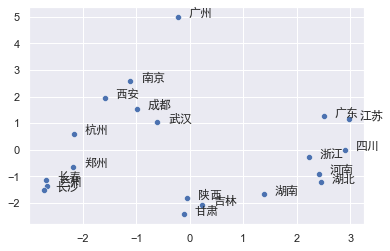

In [58]:
# PCA方法降维词向量，并可视化
L = ['江苏', '南京', '成都', '四川', '湖北', '武汉', '河南', '郑州', '甘肃', '兰州',
    '湖南', '长沙', '陕西', '西安', '吉林', '长春', '广东', '广州', '浙江', '杭州']
L_embeddings = []
for word in L:
    L_embeddings.append(wv_model.wv[word])

pca = PCA(n_components=2)
results = pca.fit_transform(L_embeddings)

sns.set()
sns.scatterplot(x=results[:, 0], y=results[:, 1], data=results)
# 添加文本标签
for i, table in enumerate(L):
    plt.text(results[i, 0] + 0.2, results[i, 1], table, family='SimHei')
plt.show()